Q1.1.1 Data Collection and Returns Calculation

(a) Download and calculate daily returns of the S&P 500 index for the 10-year period ending on
31/12/2018

In [307]:
import yfinance as yf
import pandas as pd

ticker = "^GSPC" 
start_date = "2009-01-01"
end_date = "2018-12-31"

sp500_daily = pd.DataFrame()
sp500_data = yf.download(ticker, start=start_date, end=end_date)["Adj Close"]
sp500_daily["Daily_Return"] = sp500_data.pct_change().dropna()

print(sp500_daily.head())

[*********************100%***********************]  1 of 1 completed

                           Daily_Return
Date                                   
2009-01-05 00:00:00+00:00     -0.004668
2009-01-06 00:00:00+00:00      0.007817
2009-01-07 00:00:00+00:00     -0.030010
2009-01-08 00:00:00+00:00      0.003397
2009-01-09 00:00:00+00:00     -0.021303


(b) Download and calculate daily returns for Amazon (AMZN), Boeing (BA), and General Electric
(GE) for the same period

In [308]:
tickers = ["AMZN", "BA", "GE"]

ticker_data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
ticker_daily_ret = pd.DataFrame()

for ticker in tickers:
    ticker_daily_ret[ticker+"_Daily_Return"] = ticker_data[ticker].pct_change().dropna()
print(ticker_daily_ret.head())

[*********************100%***********************]  3 of 3 completed

                           AMZN_Daily_Return  BA_Daily_Return  GE_Daily_Return
Date                                                                          
2009-01-05 00:00:00+00:00          -0.005519         0.020331        -0.025776
2009-01-06 00:00:00+00:00           0.061043         0.003032         0.013830
2009-01-07 00:00:00+00:00          -0.020223        -0.033470        -0.044484
2009-01-08 00:00:00+00:00           0.017082         0.000670         0.001862
2009-01-09 00:00:00+00:00          -0.028866        -0.007591        -0.008674


Q1.1.2. Beta Calculation (4 marks)
(c) Compute the Beta for each asset relative to the S&P 500 index. For each calculation, report
the Beta value, p-value, and 95% confidence interval.
https://www.investopedia.com/articles/investing/102115/what-beta-and-how-calculate-beta-excel.asp
https://blog.quantinsti.com/asset-beta-market-beta-python/

In [309]:
import statsmodels.api as sm
from statsmodels import regression

def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()

    return model.params[1],model.pvalues[1], model.conf_int(alpha=0.05)[1]

print(f"{'Ticker':<10}{'Beta':<10}{'95% CI (Lower, Upper)':<40}{'p-value'}")
for ticker in tickers:
    X = sp500_daily.values
    Y = ticker_daily_ret[ticker+"_Daily_Return"].values

    beta ,p_value, conf_int = linreg(X,Y)

    print(f"{ticker:<10}{beta:<10f}{conf_int[0]:<10f}, {conf_int[1]:<20f}{p_value}")

Ticker    Beta      95% CI (Lower, Upper)                   p-value
AMZN      1.092575  1.023868  , 1.161282            1.0007223333744827e-180
BA        1.106183  1.061999  , 1.150367            0.0
GE        1.166102  1.114819  , 1.217386            2.2707e-320


Q1.1.3.Interpretation and Comparison
(d) Discuss what the Beta values indicate about each asset’s volatility and market sensitivity.
Compare the results for AMZN, BA, and GE, and interpret what these values suggest about each
stock’s behavior in relation to the market.

Stock Beta is a risk measure used to compare to volatility of a stock in relation to the market, in our case we are using the S&P 500 as our market returns. We can calculate the Beta volatility using the formula:

Ri​=βRm+α

This is identical to the line formula y=mx+c, hence we can find beta by performing a best fit indicative of linear regression models. With a score of one indicating the same level of volatility as the market, if a value is higher than one this indicates increased volatility and hence excess risk and vice versa. Investors should make use of stock Betas so the associated risk in a stock is compansated by their percieved expected return.

As a practicle example we may look to the values obtained. Amazon has a beta of 1.09 ... this signifies that amazon stocks are 109% as volatile as the s&P 500, so if our base market (S&P 500) has a return of +10% then the returns on Amazon's stock will rise by 10.9% and vice versa for a negative return. Boeing has a slightly lower beta indicating less volatility with General Electric having the highest. Since we are utilising a very large dataset with 10 years or data returns we obtain a very small p-value indicating our Beta is statistically significant. The confidance interval provides us with a range containing a lower or upper bound with a confidance of 95%, this signifies that we are 95% confidant that beta lies between these two figures. In our case no interval was below or equal to 1 and so all of our tickers are always vore volatile than the market most of the time.

Q1.2
Use Apple’s daily closing prices from 01/01/2014 to 31/11/2018

In [310]:
ticker = "AAPL"
start_date = "2014-01-01"
end_date = "2018-11-30"

appl_data = yf.download(ticker, start=start_date, end=end_date)
appl_closing_prices = appl_data["Close"]

print(appl_closing_prices.head())

[*********************100%***********************]  1 of 1 completed

Ticker                          AAPL
Date                                
2014-01-02 00:00:00+00:00  19.754642
2014-01-03 00:00:00+00:00  19.320715
2014-01-06 00:00:00+00:00  19.426071
2014-01-07 00:00:00+00:00  19.287144
2014-01-08 00:00:00+00:00  19.409286


Q1.2.1
Geometric Brownian Motion Simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

appl_returns = appl_closing_prices.pct_change().dropna()
mu = float(appl_returns.mean())
sigma = float(appl_returns.std())
dt = 1
S0 = appl_closing_prices.values[-1]
S0 = S0[0]

T = 20
N = 1000

St = np.zeros((T, N))
St[0] = S0 

for t in range(1, T):
    dWt = np.random.normal(0, np.sqrt(dt), size=N)  # Brownian motion
    St[t] = St[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dWt)


print(St)
    

[[44.88750076 44.88750076 44.88750076 ... 44.88750076 44.88750076
  44.88750076]
 [46.00071484 44.14493831 44.90867169 ... 44.07995321 44.39536816
  45.65331478]
 [46.32043027 44.32243594 44.99259155 ... 43.44089982 44.82908649
  46.08469323]
 ...
 [44.40727585 45.11406671 49.63216921 ... 47.52194068 47.75149703
  43.42067015]
 [44.27095555 45.18116574 48.33033345 ... 47.3659102  47.30298691
  44.17345478]
 [44.88530097 45.58436488 48.70344208 ... 47.69348193 46.45847579
  43.31841803]]


C:\Users\gianm\AppData\Local\Temp\ipykernel_47988\3013340979.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu = float(appl_returns.mean())
C:\Users\gianm\AppData\Local\Temp\ipykernel_47988\3013340979.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma = float(appl_returns.std())


Firstly we cleaned up and defined the constant vairables in line with the explicit expression for Geometric Brownian Motion:

$\Large S_t = S_0 {\rm e}^{(\mu-\frac{\sigma^2}{2})t + \sigma W_t}$

$\mu$ and $\sigma$ are the mean and standard deviation of the returns respectfully and were hence calculated the same as in previous questions based on the historical data. Our t is 1 as we are generating daily price movements hence require a daily time step. S_0 represents the initial stock price and will be our divergance point, in our case this would be the last observed price as we want to simulate from that point onwards, so we use the last closing price in our array. Finally we randomly sample from the daily normal distribution also known as a Brownian Motion, this introduces randomness into our model.

Next, we need a structure to store our simulated paths. To achieve this, we create a blank 2D array where each row represents a single simulation. Since each simulation spans 20 days, each row contains 20 elements with each element based on the previous one. We then generate 1,000 of these simulation arrays, resulting in a final shape of (20 × 1000).

Our price realizations can be viewed on the plots below, naturally it is very dense as there are 1000 lines plotted:

[[44.88750076 44.88750076 44.88750076 ... 44.88750076 44.88750076
  44.88750076]
 [46.00071484 44.14493831 44.90867169 ... 44.07995321 44.39536816
  45.65331478]
 [46.32043027 44.32243594 44.99259155 ... 43.44089982 44.82908649
  46.08469323]
 ...
 [44.40727585 45.11406671 49.63216921 ... 47.52194068 47.75149703
  43.42067015]
 [44.27095555 45.18116574 48.33033345 ... 47.3659102  47.30298691
  44.17345478]
 [44.88530097 45.58436488 48.70344208 ... 47.69348193 46.45847579
  43.31841803]]


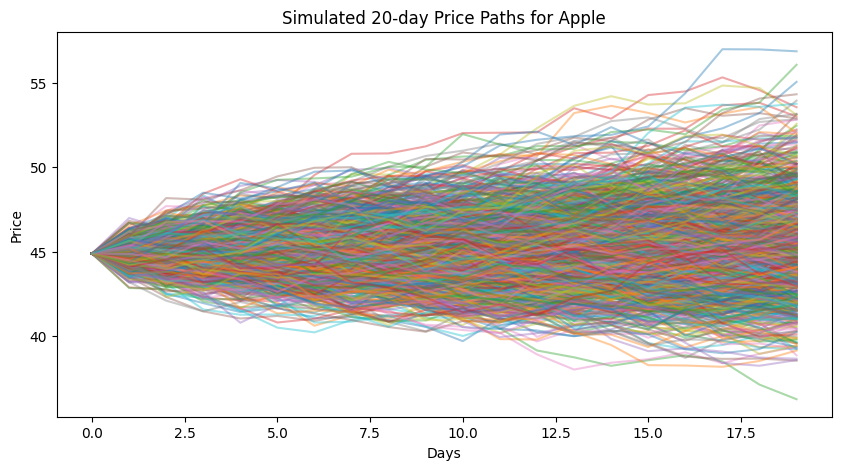

In [317]:
print(St)
plt.figure(figsize=(10, 5))
plt.plot(St, alpha=0.4)
plt.title(f"Simulated 20-day Price Paths for Apple")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [325]:
final_prices = St[-1]
returns_20d = (final_prices - S0) / S0 

VaR_95 = np.percentile(returns_20d, 5)  

print("20-day 95% Value at Risk (VaR):", round(VaR_95*100,4),"%")



20-day 95% Value at Risk (VaR): -8.5086 %


Q 1.2.2 Value at Risk (VaR) Calculation

We calculate this using the following formula:
returns=(final simulated price−initial price​)/initial price
The significance of this value represents the worst expected loss within the given confidence interval, based on our simulations there exists a 5% change by which Apple's stock will drop by 8.51% over the next 20 days.

This helps investors to prepare for a worst-case loss given a market downturn. Apple investors could opt to compare this figure to other stocks to observe its volatility.